### Read in datasets

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings('ignore')

In [29]:
url1 = "https://raw.githubusercontent.com/statzenthusiast921/wildfires/refs/heads/main/data/fire_df_wa.csv"
url2 = "https://raw.githubusercontent.com/statzenthusiast921/wildfires/refs/heads/main/data/fire_df_or.csv"
url3 = "https://raw.githubusercontent.com/statzenthusiast921/wildfires/refs/heads/main/data/fire_df_ca.csv"

df_wa = pd.read_csv(url1)
df_or = pd.read_csv(url2)
df_ca = pd.read_csv(url3, dtype={16: str, 18: str})


print(df_wa.shape)
print(df_or.shape)
print(df_ca.shape)

(33513, 19)
(61088, 19)
(189550, 19)


In [30]:
df_wa.head(3)

,NWCG_REPORTING_UNIT_NAME,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,Umatilla National Forest,UPPER JIM,2005,2453540.5,170,1430.0,1.0,Lightning,2453541.5,171.0,1400.0,0.3,B,46.220833,-117.785000,WA,27,27.0,Grays Harbor
1,Umatilla National Forest,SKYLINE,2005,2453567.5,197,1354.0,4.0,Campfire,2453567.5,197.0,1600.0,0.1,A,46.080556,-117.890833,WA,13,13.0,Columbia
2,Columbia River Gorge National Scenic Area,MP 80,2005,2453516.5,146,950.0,6.0,Railroad,2453516.5,146.0,1020.0,0.1,A,45.665000,-121.203611,WA,39,39.0,Klickitat


In [31]:
df_wa['FIPS_NAME'].value_counts().head(5)

Okanogan     2653
Spokane      2551
Stevens      2222
Chelan       1349
Klickitat    1299
Name: FIPS_NAME, dtype: int64

In [32]:
df_or['FIPS_NAME'].value_counts().head(5)

Jackson      3675
Klamath      3559
Douglas      3542
Deschutes    3260
Lane         2951
Name: FIPS_NAME, dtype: int64

In [33]:
df_ca['FIPS_NAME'].value_counts().head(5)

Riverside         6925
Los Angeles       2703
El Dorado         2676
San Bernardino    2642
San Diego         2443
Name: FIPS_NAME, dtype: int64

In [34]:
df_west_coast = pd.concat([df_wa, df_or, df_ca], ignore_index=True)
df_west_coast.shape

(284151, 19)

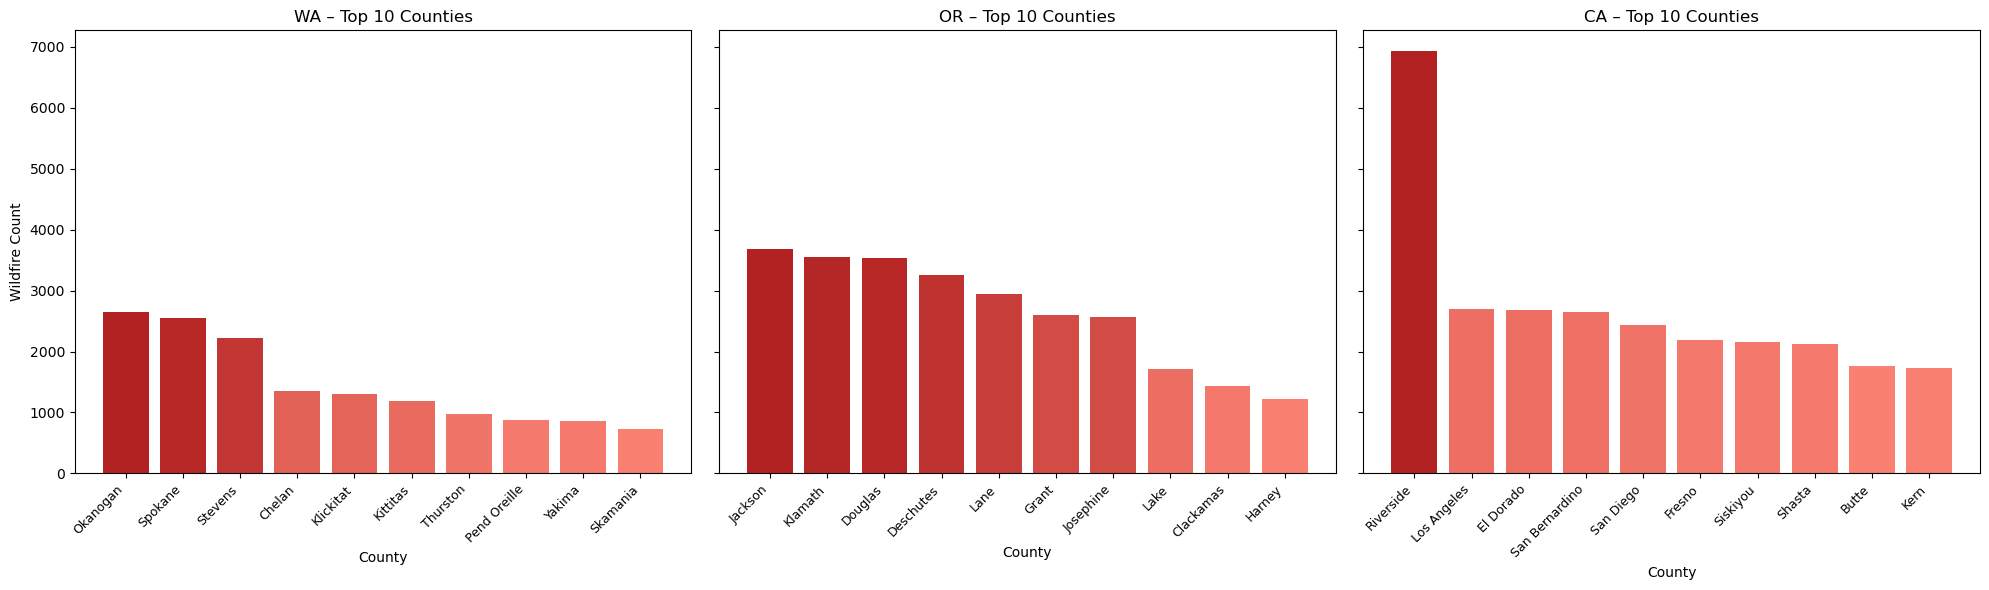

In [35]:
#----- Group by state and county name
wf_counts = df_west_coast.groupby(['STATE', 'FIPS_NAME']).size().reset_index(name='wf_count')

states = ['WA', 'OR', 'CA']
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

#----- Define a colormap from firebrick to salmon (light red)
colorscale = mcolors.LinearSegmentedColormap.from_list("firebrick_grad", ["firebrick", "salmon"])

def get_colors(values):
    norm = mcolors.Normalize(vmin=min(values), vmax=max(values))
    return [colorscale(1 - norm(v)) for v in values]


for ax, state in zip(axes, states):
    #----- Filter top 10 counties by wildfire count
    data = (wf_counts[wf_counts['STATE'] == state].nlargest(10, 'wf_count'))

    colors = get_colors(data['wf_count'])

    ax.bar(data['FIPS_NAME'], data['wf_count'], color=colors)
    ax.set_title(f'{state} – Top 10 Counties')
    ax.set_xlabel('County')
    if state == 'WA':
        ax.set_ylabel('Wildfire Count')
    ax.set_xticklabels(data['FIPS_NAME'], rotation=45, ha='right', fontsize=9)

plt.tight_layout()
plt.show()

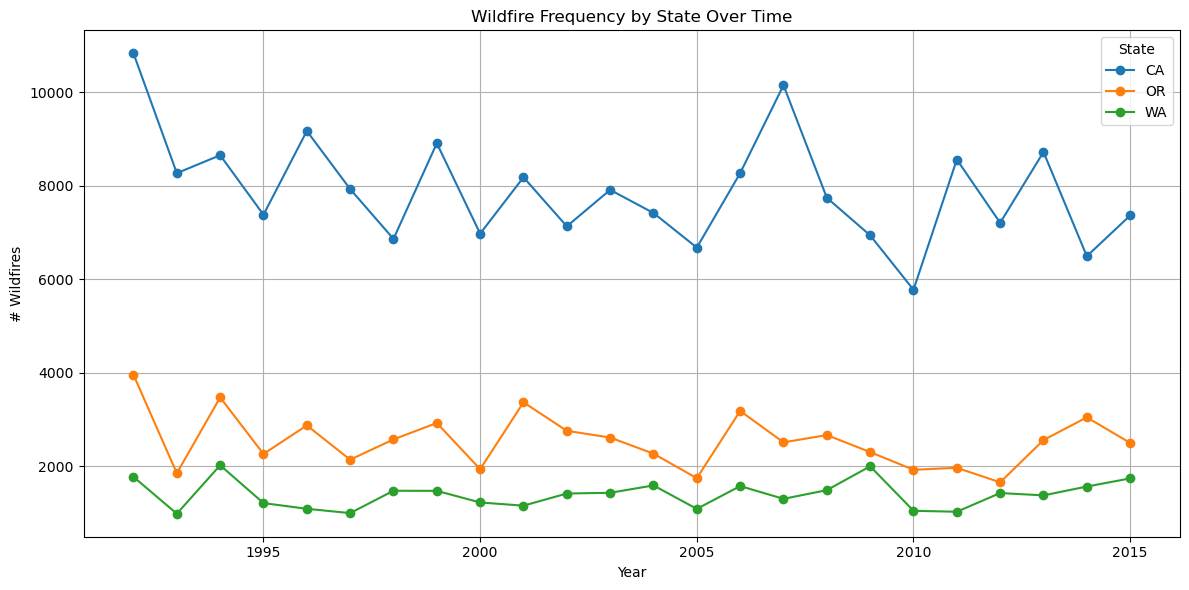

In [37]:
#----- Group by state and year, count wildfires
fires_by_year = df_west_coast.groupby(['STATE', 'FIRE_YEAR']).size().reset_index(name='fire_count')

#----- Pivot table to have years as index and states as columns
fires_pivot = fires_by_year.pivot(index='FIRE_YEAR', columns='STATE', values='fire_count').fillna(0)

#----- Make the plots
plt.figure(figsize=(12, 6))
for state in fires_pivot.columns:
    plt.plot(fires_pivot.index, fires_pivot[state], marker='o', label=state)

plt.title('Wildfire Frequency by State Over Time')
plt.xlabel('Year')
plt.ylabel('# Wildfires')
plt.legend(title='State')
plt.grid(True)
plt.tight_layout()
plt.show()
